# **Fixação Regressão**

**Objetivo:** estimar o valor necessário de investimento para obter X cliques e de acordo com o objetivo da campanha de marketing

In [64]:
!wget -q 'https://raw.githubusercontent.com/OviedoVR/ML_especializacao_2025/refs/heads/main/dados/fixacao/performance_campanhas.csv' -O 'campanhas.csv'

In [113]:
# Bibliotecas:
# Manip. Dados:
import numpy as np
import pandas as pd

# DataViz:
import matplotlib.pyplot as plt
import seaborn as sns

# Modelagem:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [66]:
# Dados:
dados = pd.read_csv('campanhas.csv')
dados.head()

,objetivo_campanha,visualizacoes,investimento_brl,cliques
0,reconhecimento da marca,3831,1399.040605,222
1,reconhecimento da marca,4483,1485.281189,97
2,venda de produtos,1548,992.997598,167
3,reconhecimento da marca,3625,1577.446638,242
4,venda de produtos,3155,1849.035475,373


In [67]:
dados['objetivo_campanha'].value_counts()

,count
objetivo_campanha,
venda de produtos,161
reconhecimento da marca,139


In [68]:
dados['objetivo_campanha'] = dados['objetivo_campanha'].replace('venda de produtos', 0).replace('reconhecimento da marca', 1)

/tmp/ipython-input-68-269463747.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados['objetivo_campanha'] = dados['objetivo_campanha'].replace('venda de produtos', 0).replace('reconhecimento da marca', 1)


In [69]:
dados['objetivo_campanha'].value_counts() / len (dados) * 100

,count
objetivo_campanha,
0,53.666667
1,46.333333


In [70]:
# Tamanho do dataset
linhas, colunas = dados.shape
print(f'Linhas: {linhas}')
print(f'Linhas: {colunas}')

Linhas: 300
Linhas: 4


In [71]:
dados.isna().sum() / len(dados) * 100

,0
objetivo_campanha,0.0
visualizacoes,0.0
investimento_brl,0.0
cliques,0.0


In [72]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
objetivo_campanha,300.0,0.463333,0.499487,0.000000,0.000000,0.000000,1.000000,1.000000
visualizacoes,300.0,3448.670000,993.780825,144.000000,2722.250000,3454.500000,4141.000000,6359.000000
investimento_brl,300.0,1686.526216,399.028286,644.427954,1397.223018,1671.108152,1970.823117,2697.699612
cliques,300.0,272.720000,129.697957,50.000000,160.750000,266.500000,383.250000,499.000000


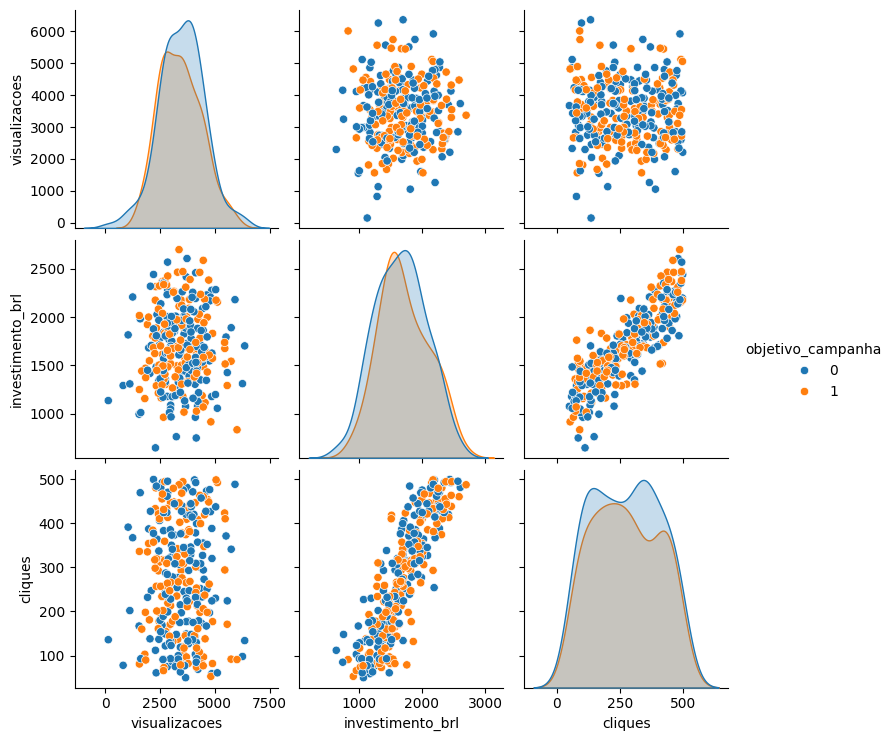

In [73]:
sns.pairplot(data=dados, hue='objetivo_campanha')

<Axes: ylabel='cliques'>

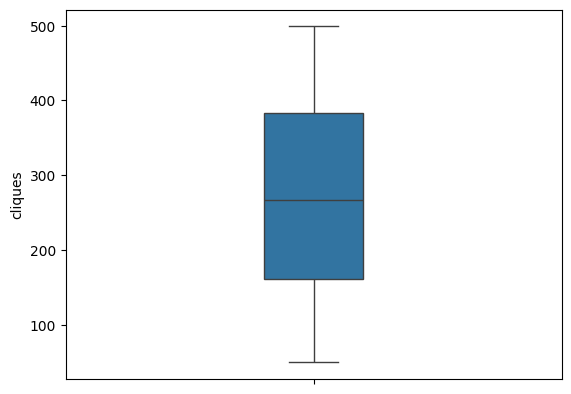

In [74]:
sns.boxplot(data=dados, y='cliques', width=0.2)

<Axes: ylabel='visualizacoes'>

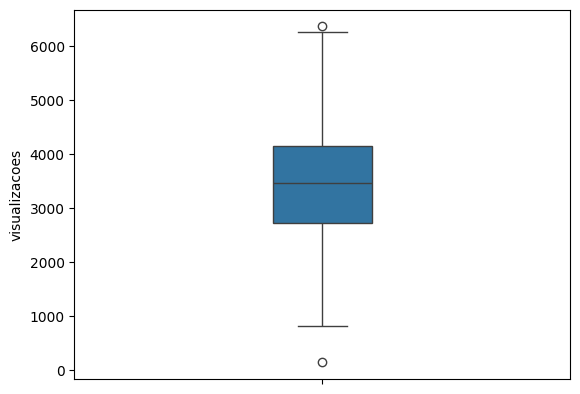

In [75]:
sns.boxplot(data=dados, y='visualizacoes', width=0.2)

<Axes: ylabel='investimento_brl'>

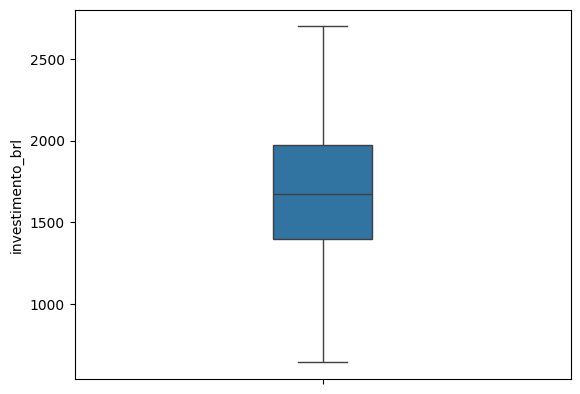

In [76]:
sns.boxplot(data=dados, y='investimento_brl', width=0.2)

<Axes: >

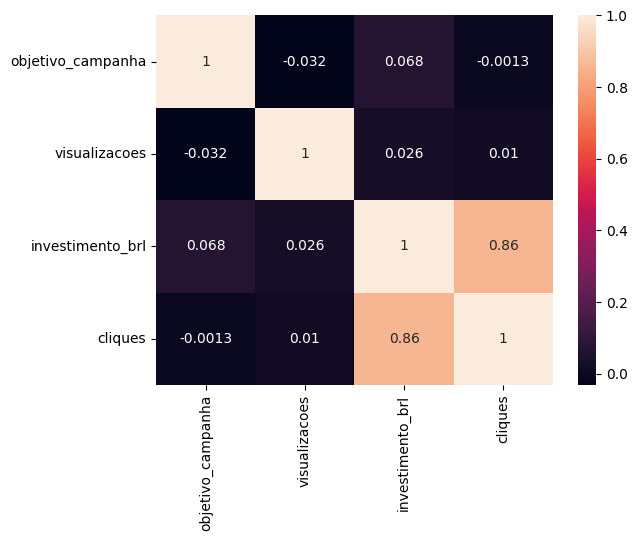

In [77]:
correlacao = dados.corr(method='pearson')
sns.heatmap(data=correlacao, annot=True )

In [78]:
dados_modelagem = dados.drop('visualizacoes', axis=1)
dados_modelagem

,objetivo_campanha,investimento_brl,cliques
0,1,1399.040605,222
1,1,1485.281189,97
2,0,992.997598,167
3,1,1577.446638,242
4,0,1849.035475,373
...,...,...,...
295,0,1844.395698,337
296,0,1959.577002,315
297,0,2078.440888,444
298,1,1067.745315,77


In [79]:
features = dados_modelagem.drop('investimento_brl', axis=1)
resposta = dados[['investimento_brl']]

# Divisão treino/teste:
x_treino, x_teste, y_treino, y_teste = train_test_split(
    features, resposta, test_size=0.25, random_state=50
)

# Tamanhos:
print(x_treino.shape)
print(x_teste.shape)
print(y_treino.shape)
print(y_teste.shape)

(225, 2)
(75, 2)
(225, 1)
(75, 1)


In [80]:
scaler = StandardScaler()

x_treino['cliques_std'] = scaler.fit_transform(x_treino[['cliques']])
x_teste['cliques_std']  = scaler.transform(x_teste[['cliques']])

x_treino.drop('cliques', axis=1, inplace=True)
x_teste.drop('cliques', axis=1, inplace=True)

In [81]:
modelo = LinearRegression()
modelo.fit(x_treino, y_treino)
modelo.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['objetivo_campanha', 'cliques_std'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([[ 67.11157481, 336.55578247]]),
 'rank_': 2,
 'singular_': array([15.00351468,  7.43871947]),
 'intercept_': array([1648.06311313])}

\begin{equation}
 investimento\_brl = 1648.1 +67.1*objetivo + 336.6*cliques
\end{equation}

In [85]:
y_pred_teste = modelo.predict(x_teste)
residuos = y_teste - y_pred_teste
print(f'Valores reais: {y_pred_teste[0:5]}')
print(f'Valores reais: {y_teste[0:5]}')
print(f'Resíduos: {residuos[0:5]}')

Valores reais: [[1240.42647044]
 [1258.72713231]
 [2296.6360982 ]
 [2046.51790472]
 [2009.05426886]]
Valores reais:      investimento_brl
238       1372.165340
97        1328.239587
179       2377.107980
219       2003.814757
102       1802.982694
Resíduos:      investimento_brl
238        131.738869
97          69.512455
179         80.471882
219        -42.703147
102       -206.071575


In [92]:
y_pred_treino = modelo.predict(x_treino)

#Treino:
mse = mean_squared_error(y_treino, y_pred_treino)
rmse = np.sqrt(mse)
r2 = r2_score(y_treino, y_pred_treino)

print(f'RMSE: {rmse}')
print(f'MSE: {mse}')
print(f'R2: {r2}')

RMSE: 206.49844492607318
MSE: 42641.60775688647
R2: 0.7269573110246155


In [93]:
#Teste:
mse = mean_squared_error(y_teste, y_pred_teste)
rmse = np.sqrt(mse)
r2 = r2_score(y_teste, y_pred_teste)

print(f'RMSE: {rmse}')
print(f'MSE: {mse}')
print(f'R2: {r2}')

RMSE: 190.51448688654213
MSE: 36295.76971364243
R2: 0.7804217795603897


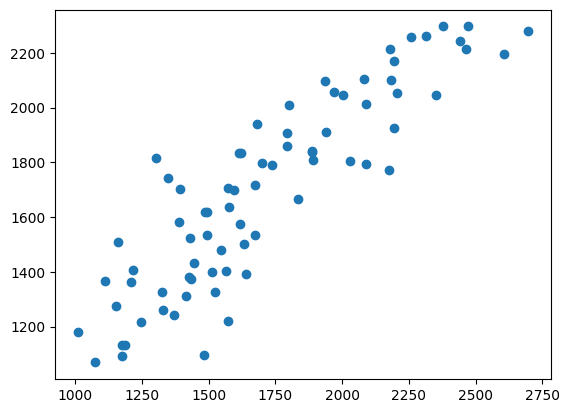

In [94]:
plt.plot(y_teste, y_pred_teste, 'o')

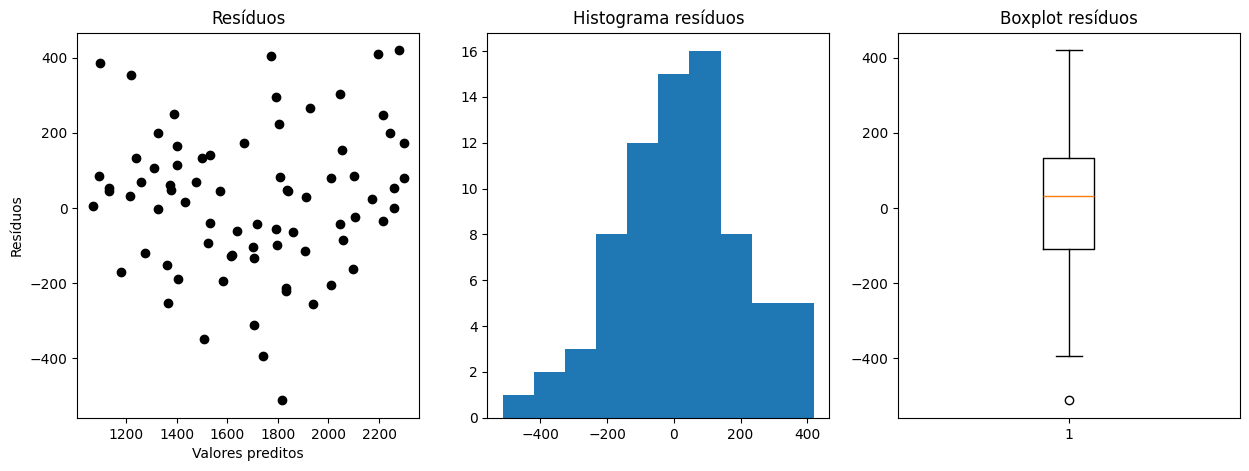

In [100]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5));
ax[0].plot(y_pred_teste, residuos, 'ok');
ax[0].set_title('Resíduos');
ax[0].set_xlabel('Valores preditos');
ax[0].set_ylabel('Resíduos');
ax[1].hist(residuos);
ax[1].set_title('Histograma resíduos');
ax[2].boxplot(residuos);
ax[2].set_title('Boxplot resíduos');

In [122]:
x_treino.columns

objetivo = 1
cliques = 200

cliques_std = scaler.transform([[cliques]])[0][0]
cliques_std

array_pred = np.array([[objetivo, cliques_std]])
array_pred

investimento_necessario = modelo.predict(array_pred)
investimento_necessario

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[1528.00829978]])

In [111]:
dados.head(2)

,objetivo_campanha,visualizacoes,investimento_brl,cliques
0,1,3831,1399.040605,222
1,1,4483,1485.281189,97


<Axes: xlabel='cliques', ylabel='investimento_brl'>

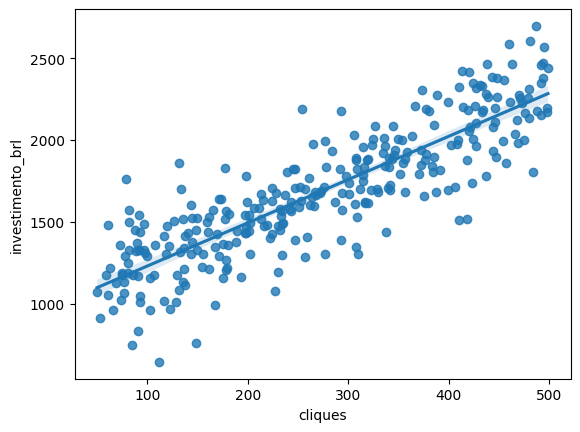

In [112]:
sns.regplot(data=dados, x='cliques', y='investimento_brl')

In [119]:
# Validação cruzada:
scores = cross_val_score(modelo, x_treino, y_treino, cv=5, scoring='r2')

for score in scores:
  print(f'R²: {score}')

print(f'\nR² médio: {scores.mean()}')
print(f'R² (std): {scores.std()}')

R²: 0.6112744049266772
R²: 0.7964716527614322
R²: 0.7450013174687162
R²: 0.6525862325828617
R²: 0.6966634514551744

R² médio: 0.7003994118389724
R² (std): 0.06551721885023917
